# Face Detection => Image Crop (Face) => Save Cropped images

## + "DONTDO" Model 흐름도 내 필요 함수 (raw_frame 이미지 크롭하여 return 하는 함수)

<a href="https://colab.research.google.com/github/ialhashim/DenseDepth/blob/master/DenseDepth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
# 경로 이동
#!cd gdrive/My Drive/depth/DenseDepth-master/DenseDepth-master

/bin/bash: line 0: cd: too many arguments


In [44]:
# face detection model
!pip install mtcnn

In [45]:
!pip install tensorflow

# 얼굴 부분 디텍션 후 잘라서 파일로 저장 (진행 도중 정지했음)

In [47]:
from mtcnn import MTCNN
from skimage import io
import cv2
import glob
from PIL import Image
from matplotlib import pyplot as plt
from skimage import io
import numpy as np

# 경로 설정
base_dir = "gdrive/My Drive/MAFA/train_images/NAKED_train/" # 자르고 싶은 이미지 있는 경로
new_dir = "gdrive/My Drive/MAFA/train_images/NAKED_cropped_train/" # 자른 후 이미지 저장할 경로 ★★ 폴더 미리 만드셔야 할 듯 ★★ 

# face detector model
detector = MTCNN()

img_folder=glob.glob(base_dir + '*.jpg') 
num_error = 0
stage = 0
for img_dir in img_folder:
  stage += 1
  print("progress rate : {}/{}".format(stage, len(img_folder)))
  #img = io.imread(img_dir)
  img_tmp = Image.open(img_dir)
  img = np.array(img_tmp)
  
  # 3차원인 이미지만 진행 // 나머지는 pass
  if img.shape[2] == 3 :
    face_box = detector.detect_faces(img) # detector 모델에서 face info. return

    if face_box : # 얼굴을 찾은 경우에만 !
      # face_boundingbox 좌표
      x,y = face_box[0]["box"][0], face_box[0]["box"][1]
      w,h = face_box[0]["box"][2] , face_box[0]["box"][3]
      para = 40 # padding_para

      if (y-para) < 0 :
        y_s = 0
      if (y+h+para) > img.shape[0] : # img.shape[0] : 원본 이미지의 세로 길이
        y_e = img.shape[0]
      if (x-para) < 0 :
        x_s = 0
      if (x+w+para) > img.shape[1] : # img.shape[1] : 원본 이미지의 가로 길이
        x_e = img.shape[1]

      # Crop
      dst = img.copy() 
      dst = dst[y_s : y_e, x_s : x_e]
      
      
      # 자른 이미지 저장
      savePath = new_dir + '%s' %img_dir.split('/')[-1] # 동일 이름으로
      dst = Image.fromarray(dst)
      dst.save(savePath)

      print(savePath)

progress rate : 1/4233
gdrive/My Drive/MAFA/train_images/NAKED_cropped_train/train_00015389.jpg
progress rate : 2/4233
gdrive/My Drive/MAFA/train_images/NAKED_cropped_train/train_00015390.jpg
progress rate : 3/4233
gdrive/My Drive/MAFA/train_images/NAKED_cropped_train/train_00015391.jpg
progress rate : 4/4233
gdrive/My Drive/MAFA/train_images/NAKED_cropped_train/train_00015396.jpg
progress rate : 5/4233
gdrive/My Drive/MAFA/train_images/NAKED_cropped_train/train_00015400.jpg
progress rate : 6/4233
gdrive/My Drive/MAFA/train_images/NAKED_cropped_train/train_00015406.jpg
progress rate : 7/4233
gdrive/My Drive/MAFA/train_images/NAKED_cropped_train/train_00015407.jpg
progress rate : 8/4233
gdrive/My Drive/MAFA/train_images/NAKED_cropped_train/train_00015420.jpg
progress rate : 9/4233
gdrive/My Drive/MAFA/train_images/NAKED_cropped_train/train_00013863.jpg
progress rate : 10/4233
gdrive/My Drive/MAFA/train_images/NAKED_cropped_train/train_00013866.jpg
progress rate : 11/4233
gdrive/My Drive

KeyboardInterrupt: ignored

# Raw_Frame Image => Face Detection => Image Crop => return 함수

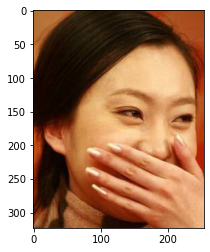

In [0]:
# raw_frame 이미지 => face_detection => crop => return
# raw_frame 형태는 array 형태여야 함 


from mtcnn import MTCNN

# face detector model
detector = MTCNN()

# 3차원인 이미지만 진행 // 나머지는 pass
if raw_frame.shape[2] == 3 :
  face_box = detector.detect_faces(raw_frame) # detector 모델에서 face info. return

  if face_box : # 얼굴을 찾은 경우에만 !

    # face_boundingbox 좌표
    x,y = face_box[0]["box"][0], face_box[0]["box"][1]
    w,h = face_box[0]["box"][2] , face_box[0]["box"][3]

    para = 40  # padding_para
    if (y-para) < 0 :
      y_s = 0
    if (y+h+para) > raw_frame.shape[0] : # raw_frame.shape[0] : 원본 이미지의 세로 길이
      y_e = raw_frame.shape[0]
    if (x-para) < 0 :
      x_s = 0
    if (x+w+para) > raw_frame.shape[1] : # raw_frame.shape[1] : 원본 이미지의 가로 길이
      x_e = raw_frame.shape[1]

    # Crop
    dst = raw_frame.copy() 
    dst = dst[y_s : y_e, x_s : x_e]
    
    # 자른 이미지 리턴
    #plt.imshow(dst)
    return dst

In [0]:
#!python test_y.py